In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from keras.optimizers import Adam

training_path = 'train/'
test_path = 'test/'
train=pd.read_csv('train.csv')

#print(os.listdir())

In [40]:
datagen = ImageDataGenerator(rescale=(1/255))
batch_size = 150
train['has_cactus'] = train['has_cactus'].astype(str)
train_generator = datagen.flow_from_dataframe(dataframe=train[:15001],directory=training_path,x_col="id",
                                            y_col="has_cactus",class_mode="binary",batch_size=batch_size,
                                            target_size=(150,150))

valid_generator = datagen.flow_from_dataframe(dataframe = train[15000:],directory=training_path,x_col="id", y_col="has_cactus",
                                             class_mode="binary",batch_size= batch_size ,target_size=(150,150))

batchX, batchy = train_generator.next()
print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

Found 14998 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.
Batch shape=(150, 150, 150, 3), min=0.000, max=1.000


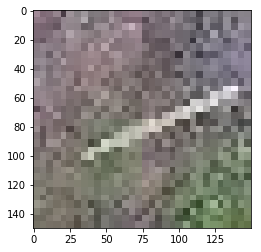

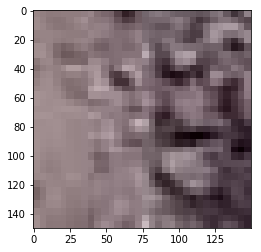

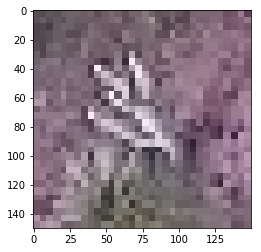

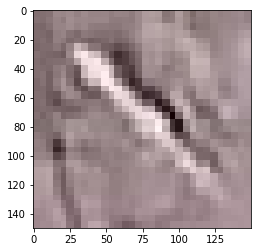

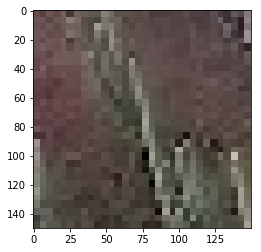

In [3]:
for i in range(0,1):
    image = batchX[i]
    image = image.squeeze()
    plt.imshow(image)
    plt.show()

In [44]:
class TrainModel:
    
    def __init__(self, train_generator, lr: float = 0.001, epochs: int = 10, batch_size: int = 32,
                 loss: str = 'binary_crossentropy'):
        self.train_generator = train_generator
        self.valid_generator = valid_generator
                
        self.epochs = epochs
        self.batch_size = batch_size

        self.optimizer = Adam(lr=lr)
        self.loss = loss

    def create_model(self, summarize: bool = True):
        model= Sequential()
        model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
        model.add(MaxPooling2D((2,2)))
        model.add(Conv2D(filters = 32, kernel_size = 1, activation = 'relu'))
        model.add(Conv2D(64,(3,3),activation='relu',input_shape=(150,150,3)))
        model.add(MaxPooling2D((2,2)))
        model.add(Conv2D(128,(3,3),activation='relu',input_shape=(150,150,3)))
        model.add(MaxPooling2D((2,2)))
        model.add(Conv2D(128,(3,3),activation='relu',input_shape=(150,150,3)))
        model.add(MaxPooling2D((2,2)))
        model.add(Flatten())
        model.add(Dense(512,activation='relu'))
        model.add(Dense(1,activation='sigmoid'))
        
        if summarize:
            model.summary()

        return model    
    
    def compile(self, kmodel: Sequential):
        kmodel.compile(loss=self.loss,optimizer=self.optimizer,metrics=['acc'])
        
        return kmodel
    
    def train(self, kmodel: Sequential):
        history = kmodel.fit_generator(self.train_generator,steps_per_epoch=100,epochs=10,validation_data=valid_generator,
                            validation_steps=50) 
        return history, kmodel

In [45]:
def plot_training_curves(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(1, len(acc) + 1)
    
    plt.plot(epochs, loss, 'r', label='Training loss')
    plt.plot(epochs, val_loss, 'g', label='Validation loss')
    plt.title('Losses')
    plt.legend()
    plt.figure()
    
    plt.plot(epochs, acc, 'r', label='Training acc')
    plt.plot(epochs, val_acc, 'g', label='Validation acc')
    plt.title('Accuracies')
    plt.legend()
    plt.figure()
    
    plt.show()

In [48]:
trainer = TrainModel(train_generator, epochs=2, batch_size=1024, lr=0.0002)

model = trainer.create_model()
model = trainer.compile(model)

history = trainer.train(model)

history=model.fit_generator(train_generator,steps_per_epoch=5,epochs=10,validation_data=valid_generator,
                            validation_steps=50) 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 74, 74, 32)        1056      
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 17, 17, 128)       0         
__________

KeyboardInterrupt: 

In [47]:
plot_training_curves(history)

NameError: name 'history' is not defined